<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/DataFrame1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 판다스 데이터프레임
판다스 데이터프레임은 다음 그림과같이 행과 열로 구성된 2차원 데이터(엑셀 데이터)를 다루는데 효과적인 자료구조입니다.   
- ndarray, series, dataframe 학습 순서 :  생성 -> 인덱싱, 슬라이싱 -> 수정 -> 점검

In [ ]:
# Q&A TIME
# 1. python은 원칙적으로 public, protect, private 기능이 불가하지만, __var 등을 통해 우회적으로 상속받은 객체가 상위 클래스에 접근하지 못하도록 할 수 있다. 
class 마린:
  def 방어하기(self):
    self.__var = 

class 저그(마린):   # inheritance
  def 공격하기:
    print("두두두두두")

m = 저그()
m.방어하기
m.공격하기    


# 2. 문자열 검색
a = "abc 나는 배고파"
"abc in a"
a.index("나는")

# web scrapping
import requests
import pandas as pd
url = "https://finance.naver.com/"
r = requests.get(url, auth=('user','pass'))
website = r.text
dfs = pd.read_html(website, encoding='UTF-8')
dfs = pd.read_html(url)
print(dfs)

# python interpreter는 리스트가 들어오면 슬라이싱하라는 의미로 해석 -> [] 1차원 리스트 / [[]] 2차원 리스트  -> 따라서, 슬라이싱하면 []는 시리즈를 반환하고, [[]]는 데이터프레임을 반환 

<img src="https://i.ibb.co/7VjmyLd/pandas-0-0.png" width="300" style="float:left" />

데이터 프레임은 다음과 같이 import를 합니다.

In [ ]:
from pandas import DataFrame
import pandas as pd

In [ ]:
import numpy as np

데이터 프레임은 크게 세 가지 방법으로 생성할 수 있습니다. 
-	딕셔너리로 데이터프레임을 생성
-	리스트로 데이터프레임을 생성
-	리스트와 딕셔너리로 데이터프레임을 생성

#### 딕셔너리로 데이터프레임 생성

우선 위 테이블을 딕셔너리로 표현해 보겠습니다. 하나의 컬럼을 딕셔너리의 키, 값 쌍으로 구성합니다. 이 때 값은 리스트 형태로 정의합니다. 

In [ ]:
딕셔너리 = {   # 2차원 데이터 표현
        "x": [10, 20],   # x, y는 column명, index 0과 1은 자동으로 mapping됨, list에 있는 값은 데이터
        "y": [20, 30]
}
df = DataFrame(딕셔너리)  # df = DataFrame(data = 딕셔너리)
df # colab은 print(df)보다 예쁘게 데이터프레임을 출력해주는 기능(복사해서 사용하기)

,x,y
0,10,20
1,20,30


데이터프레임은 생성자에서 딕셔너리를 입력받아 객체를 반환합니다. 코드를 실행하면 자동으로 맵핑된 인덱스가 함께 출력됩니다. 



#### 리스트로 데이터프레임 생성
테이블의 헤더 (시가/고가/저가/종가의 1행)를 제외하고 나머지 데이터를 2차원 형태로 정의합니다. 

In [ ]:
리스트 = [
       [10,20],  # 리스트는 인덱스와 컬럼명이 지정되지 않아, 자동으로 맵핑된 인덱스 값이 들어간다
       [30,40]    
]

df = DataFrame(리스트)
df

,0,1
0,10,20
1,30,40


그리고 생성자에 columns 파라미터로 헤더 정보를 전달합니다. 

In [ ]:
print(df.index.tolist()) # 인덱스를 가져오기
df.index = ['x', 'y']    # 인덱스를 통해 dataframe update(인덱스에 접근할 수 있다면 값을 수정할 수 있기 떄문)
df

[0, 1]


,0,1
x,10,20
y,30,40


In [ ]:
# (data) header(=column)
df.columns = ['a', 'b']
df

,a,b
x,10,20
y,30,40


데이터 프레임에도 다양한 속성 (인스턴스 변수)이 있는데 columns 파라미터에는 테이블 열의 제목이 들어있습니다. 

#### 리스트와 딕셔너리를 조합
세 번째 방식은 두 번째와 유사하게 행 단위로 데이터를 표현하는데 이 때 데이터에 레이블을 붙여서 각 행을 하나의 딕셔너리로 표현합니다. 말로 풀어쓰면 어려운데 코드를 보면 쉽게 이해할 수 있습니다. 

In [ ]:
# 리스트 안에 여러 개의 딕셔너리(key:value의 집합으로 데이터가 구성되어 있음)가 들어있음
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105}, 
    {'시가':  90, '고가': 112, '저가': 80, '종가':  95}, 
    {'시가':  80, '고가': 115, '저가': 70, '종가':  85}, 
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75}, 
]

df = DataFrame(data)
df

,시가,고가,저가,종가
0,100,110,90,105
1,90,112,80,95
2,80,115,70,85
3,70,80,60,75


데이터 프레임도 시리즈와 유사하게 인덱스를 지정할 수 있습니다.  
- 생성할 때 인덱스 추가  
- 생성 후에 인덱스 추가  

In [ ]:
z = [
     [10,20],
     [30,40],
]
idx = ['x', 'y']
col = ['a', 'b']
df = DataFrame(data= z, index=idx, columns = col)
df

,a,b
x,10,20
y,30,40


세 가지 방식 모두 동일한 데이터프레임 객체를 생성합니다. 원본 데이터가 저장된 형태에 따라 적합한 데이터프레임 생성 방식을 사용하면 됩니다. 

----

보통 데이터는 웹에서 가져오거나 엑셀에서 저장돼 있습니다. 데이터 프레임은 엑셀이나 웹에서 값을 얻어오는 메서드를 제공하기 때문에 처음부터 데이터 프레임을 만들일은 생각보다 많지 않습니다. 

In [ ]:
# scrapping : url을 통해 웹에 있는 데이터를 갖고 오기
import pandas as pd
url = "https://finance.naver.com/sise/lastsearch2.nhn"  # 한글이라서 encoding해야 함
dfs = pd.read_html(url)  #리스트 형태로 데이터를 수집해서 반환(테이블 형태의 값만 가져올 수 있음)
print(type(dfs))
dfs[0]

<class 'list'>


,0,1,2,3,4,5
0,°Å·¡·®,¸Å¼öÈ£°¡,°Å·¡´ë±Ý(¹é¸¸),½Ã°¡ÃÑ¾×(¾ï),¿µ¾÷ÀÌÀÍ(¾ï),PER(¹è)
1,½Ã°¡,¸ÅµµÈ£°¡,ÀüÀÏ°Å·¡·®,ÀÚ»êÃÑ°è(¾ï),¿µ¾÷ÀÌÀÍÁõ°¡À²,ROE(%)
2,°í°¡,¸Å¼öÃÑÀÜ·®,¿Ü±¹ÀÎºñÀ²,ºÎÃ¤ÃÑ°è(¾ï),´ç±â¼øÀÌÀÍ(¾ï),ROA(%)
3,Àú°¡,¸ÅµµÃÑÀÜ·®,»óÀåÁÖ½Ä¼ö(ÃµÁÖ),¸ÅÃâ¾×(¾ï),ÁÖ´ç¼øÀÌÀÍ(¿ø),PBR(¹è)
4,NaN,NaN,NaN,¸ÅÃâ¾×Áõ°¡À²,º¸ÅëÁÖ¹è´ç±Ý(¿ø),À¯º¸À²(%)


In [ ]:
# 엑셀 파일읽어오기
pd.read_csv("/content/sample_data/california_housing_test.csv") # csv 파일을 읽어서 df으로 반환

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


## 데이터 프레임의 구조

데이터프레임의 각 컬럼은 시리즈이며 같은 인덱스를 갖는 시리즈가 모여 하나의 데이터 프레임을 구성합니다. 

<img src="https://i.ibb.co/Xx2rtYB/pandas-0-1.png" width="600" style="float:left" />

데이터 프레임은 다음과 같이 시가/고가/저가/종가 네 개의 시리즈로 구분할 수 있습니다. 

<img src="https://i.ibb.co/x6RMmHV/pandas-0-2.png" width="600" style="float:left" />

혹은 데이터프레임의 각 로우(row)는 시리즈이며 네 개의 시리즈로 구성됐다고 해석할 수 있습니다.

<img src="https://i.ibb.co/GpLVrCS/pandas-0-3.png" width="600" style="float:left" />
- 1. 동일한 인덱스를 갖는 column 시리즈 4개가 concat된 것
- 2. 하나의 행을 회전하면 하나의 시리즈처럼 만들 수 있다(시가, 고가, 저가, 종가를 인덱스로 하는 4개의 시리즈가 concat된 것)
-> df은 여러 개의 시리즈가 한 데 모여 있는 것

이번에는 시가/고가/저가/종가의 인덱스를 갖는 네 개의 시리즈를 확인할 수 있습니다. 

<img src="https://i.ibb.co/PGMNKH9/pandas-0-4.png" width="600" style="float:left" />

Q. 다음 선택된 시리즈의 인덱스는 무엇인가?

<img src="https://i.ibb.co/3RP6LMC/pandas-0-5.png" width="400" style="float:left" />

## 데이터프레임과 인덱싱

데이터프레임은 2차원 자료를 저장하기 때문에 로우 혹은 컬럼 단위로 데이터를 가져올 수 있습니다. 다음의 데이터프레임을 사용해서 인덱싱을 연습해 봅시다.

In [ ]:
import pandas as pd
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105}, 
    {'시가':  90, '고가': 112, '저가': 80, '종가':  95}, 
    {'시가':  80, '고가': 115, '저가': 70, '종가':  85}, 
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75}, 
]

df = pd.DataFrame(data, index=['20200615', '20200616', '20200617', '20200618'])
df

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,90,112,80,95
20200617,80,115,70,85
20200618,70,80,60,75


우선 컬럼의 데이터를 가져와 봅시다. 컬럼은 컬럼의 이름(columns)을 사용해서 선택할 수 있습니다. 

In [ ]:
df['고가']   # '고가' column을 가져온다 -> 이 때 인덱스는 (20200615...)   -> 동일한 인덱스를 갖는 4개의 시리즈가 한데 모인 df
# df에서 대괄호를 사용 = column의 데이터를 갖고 오겠다.

20200615    110
20200616    112
20200617    115
20200618     80
Name: 고가, dtype: int64

`ndarray`에서 사용해 본 것과 같이 연속하지 않은 컬럼을 선택할 수도 있습니다.

In [ ]:
# slicing (df를 slicing하면 df)
df['고가':'종가']    # column의 데이터를 갖고 올 때 dataframe은 이 기능을 지원하지 않는다(문법적으로 불가)
df[['고가','종가']]  # 1) column의 이름을 직접 지정하기

,고가,종가
20200615,110,105
20200616,112,95
20200617,115,85
20200618,80,75


In [ ]:
df.columns[0]

'시가'

In [ ]:
df.columns[0:2]

Index(['시가', '고가'], dtype='object')

In [ ]:
# 2) series, ndarray와 같은 slicing하는 방법
df[df.columns[0:2]]

,시가,고가
20200615,100,110
20200616,90,112
20200617,80,115
20200618,70,80


로우 데이터는 `iloc`와 `loc`를 사용해서 값을 얻어올 수 있습니다. 
- df에서 행단위로 선택할 때 : iloc, loc
- column 단위로 데이터를 제어할 때 : 대괄호[]와 함꼐 column의 이름 정보를 넣어주기
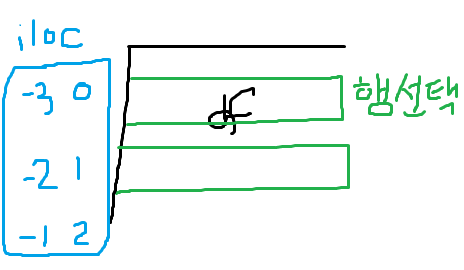

In [ ]:
# 시리즈
from pandas import Series
s = Series(["a","b"], index=["x","y"])
print(s.loc['x'])
print(s.iloc['-1'])

In [ ]:
# df에서 loc, iloc은 행단위로 선택하므로 이 때의 인덱스는 20200615
print(df.loc["20200615"])
print(df.iloc[0])  

시가    100
고가    110
저가     90
종가    105
Name: 20200615, dtype: int64
시가    100
고가    110
저가     90
종가    105
Name: 20200615, dtype: int64


당연히 연속하지 않은 여러개의 로우도 선택할 수 있습니다.

In [ ]:
df.iloc[[-1,0]]

,시가,고가,저가,종가
20200618,70,80,60,75
20200615,100,110,90,105


이번에는 데이터프레임에 저장된 하나의 값 (115)를 출력해 보겠습니다.  

In [ ]:
# 115를 인덱싱하는 method 1
df['고가'][2]  #df['고가']는 시리즈이므로 [2] ... 여러 방법으로 인덱싱과 슬라이싱이 가능하지만 비추
df['고가'].loc['20200617']
df['고가'].iloc[2]

115

In [ ]:
# method 2
df.loc['20200617'].loc['고가']
df.loc['20200617'].iloc[1]

# 비추
df.loc['20200617']['고가']
df.loc['20200617'][1]

# method 3
df.iloc[2].loc['고가']
df.iloc[2].iloc[1]

115

In [ ]:
# method 4 : 추천(한 번의 연산만 하기 때문에 실행 속도 빠름)
df.loc['20200617', '고가']  #[행, 열]
df.iloc[2, 1]

115

데이터 프레임에서는 `[ ]` 인덱싱 기호 한 번에 행과 열을 지정할 수도 있습니다. 

In [ ]:
df.iloc[0:2, 0:2]
df.loc['20200615':'20200616', '시가':'고가']  # 유지보수를 고려하면 loc가 가독성이 더 좋음
df.iloc[[0,1],[0,1]]
df.loc[['20200615','20200616'],['시가','고가']]

,시가,고가
20200615,100,110
20200616,90,112


### 데이터프레임 수정
데이터프레임에 값을 수정하거나 추가해봅시다.

In [ ]:
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105}, 
    {'시가':  90, '고가': 112, '저가': 80, '종가':  95}, 
    {'시가':  80, '고가': 115, '저가': 70, '종가':  85}, 
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75}, 
]

df = DataFrame(data, index=['20200615', '20200616', '20200617', '20200618'])
df

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,90,112,80,95
20200617,80,115,70,85
20200618,70,80,60,75


데이터 프레임에 컬럼 단위로 값을 추가할 때는 컬럼의 이름과 값을 전달하면 됩니다. 만약 하나의 값을 입력한다면 컬럼 전체가 해당 값으로 채워집니다.

,시가,고가,저가,종가,NEW
20200615,100,110,90,105,10
20200616,90,112,80,95,10
20200617,80,115,70,85,10
20200618,70,80,60,75,10


리스트 형태로 값을 전달할 수도 있습니다.

,시가,고가,저가,종가,NEW
20200615,100,110,90,105,10
20200616,90,112,80,95,20
20200617,80,115,70,85,30
20200618,70,80,60,75,40


하나의 값을 변경할 때는 `변경할위치 = 값` 형태로 코드를 작성합니다.

Q. 고가와 저가의 차이를 "변동폭" 이름의 칼럼에 저장하라.

In [ ]:
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105}, 
    {'시가':  90, '고가': 112, '저가': 80, '종가':  95}, 
    {'시가':  80, '고가': 115, '저가': 70, '종가':  85}, 
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75}, 
]

df = DataFrame(data, index=['20200615', '20200616', '20200617', '20200618'])
df

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,90,112,80,95
20200617,80,115,70,85
20200618,70,80,60,75


로우 단위의 데이터를 추가할 때는 `iloc` 혹은 `loc`를 사용하는 것외에 동일합니다.

In [ ]:
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105}, 
    {'시가':  90, '고가': 112, '저가': 80, '종가':  95}, 
    {'시가':  80, '고가': 115, '저가': 70, '종가':  85}, 
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75}, 
]

df = DataFrame(data, index=['20200615', '20200616', '20200617', '20200618'])
df

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,90,112,80,95
20200617,80,115,70,85
20200618,70,80,60,75


`20200619` 로우에 값을 추가

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,90,112,80,95
20200617,80,115,70,85
20200618,70,80,60,75
20200619,10,10,10,10


값을 삭제할 때는 시리즈와 동일하게 drop메서드를 사용합니다. 차이점은 데이터프레임은 2차원 형태이기 때문에 가로축 삭제인지 세로축 삭제인지를 알려줘야 합니다. `axis`는 컬럼 단위로 삭제할지 로우 단위로 삭제할지를 지정합니다. `axis=1`은 컬럼 단위로 삭제한다는 의미입니다.

In [ ]:
df.drop('시가', axis=1)

,고가,저가,종가
20200615,110,90,105
20200616,112,80,95
20200617,115,70,85
20200618,80,60,75


로우 단위로도 삭제할 수 있습니다. `axis`를 입력하지 않으면 0으로 간주됩니다.

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,90,112,80,95
20200617,80,115,70,85


## 인덱스 및 칼럼 설정하기

`reset_index`는 인덱스를 칼럼으로 변경합니다.

,index,시가,고가,저가,종가
0,20200615,100,110,90,105
1,20200616,90,112,80,95
2,20200617,80,115,70,85
3,20200618,70,80,60,75


`set_index`는 칼럼 이름으로 인덱스를 설정합니다. 

## 데이터프레임 연결하기
하나 이상의 데이터 프레임을 연결할 수 있습니다. 

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.random.randn(4, 2), columns=['A', 'B'])
df1

,A,B
0,-0.532825,-0.799201
1,0.699131,-0.703095
2,-0.337424,-1.686015
3,-0.161084,-0.330879


In [ ]:
df2 = pd.DataFrame(np.random.randn(4, 2), columns=['A', 'B'])
df2

,A,B
0,0.617020,0.151633
1,-0.308665,0.358633
2,0.802221,-0.870168
3,0.198000,0.282982


`append` 메서드로 연결한 데이터 프레임을 전달합니다

In [ ]:
df1.append(df2)

,A,B
0,1.382102,-1.346167
1,-1.106819,1.331357
2,0.384795,-1.562648
3,0.064274,1.145529
0,-0.559248,-1.183500
1,0.911591,-1.103314
2,0.529724,-0.685318
3,-0.990691,0.052634


pd의 `concat` 함수로 연결할 데이터 프레임을 리스트로 전달합니다.

### merge
`pandas`에 정의된 `merge` 함수를 사용할 수도 있습니다. 

In [ ]:
df1 = DataFrame( np.random.randint(10, size=(2,4)), columns=["a", "b", "c", "d"])
df1['구분'] = ["가", "나"]
df1

,a,b,c,d,구분
0,3,9,1,9,가
1,8,0,1,1,나


In [ ]:
df2 = DataFrame( np.random.randint(10, size=(4,4)), columns=["e", "f", "g", "h"])
df2['구분'] = ["가", "나", "다", "가"]
df2

,e,f,g,h,구분
0,3,1,7,0,가
1,9,3,5,6,나
2,9,3,6,2,다
3,5,9,8,5,가


`pd.merge(df1, df2, on="칼럼이름")` 형태로 사용합니다.

In [ ]:
pd.merge(df1, df2, on="구분")

,a,b,c,d,구분,e,f,g,h
0,3,9,1,9,가,3,1,7,0
1,3,9,1,9,가,5,9,8,5
2,8,0,1,1,나,9,3,5,6


`how` 옵션을 사용하면 `join` 방식을 지정할 수 있습니다. 
- `left` / `right` / `inner`